# Adam Algorithm Explanation and Application

## Introduction


Adam (short for Adaptive Moment Estimation) is an optimization algorithm that combines the advantages of two other extensions of Stochastic Gradient Descent (SGD): AdaGrad and RMSProp. It is widely used in training deep learning models due to its adaptive learning rate and momentum features.

## Key Features of Adam:

- `Adaptive Learning Rate:` Adam computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients.

- `Momentum:` Uses the concept of momentum to accelerate convergence.



# Disadvantages of Previous Optimizers:

##1. Gradient Descent (GD):`
- `Sensitivity to Learning Rate: `Choosing the right learning rate is crucial. If it is too small, the convergence will be very slow. If it is too large, the algorithm might overshoot the minimum and fail to converge.
  
- `Stuck in Local Minima:` Gradient descent can get stuck in local minima, especially in non-convex optimization problems, leading to suboptimal solutions.

- `Noisy Updates: `Gradient descent updates can be noisy due to the stochastic nature of data in each mini-batch.

##2. Stochastic Gradient Descent (SGD)
  
 - `High Variance in Updates: `The updates in SGD can have high variance, leading to a noisy trajectory and instability in convergence.
  
 - `Sensitive to Learning Rate: `Similar to GD, SGD requires careful tuning of the learning rate.
  
-  `Slow Convergence:` Although SGD can escape local minima more easily, it can still converge slowly if not properly tuned.

##3. Momentum:
  
 - `Parameter Sensitivity:` Methods like Momentum and Nesterov Accelerated Gradient (NAG) require careful tuning of the momentum parameter, which can be challenging.
  
 - `Overshooting: `With an improperly tuned momentum parameter, these methods can overshoot the optimal solution.

##3. AdaGrad (Adaptive Gradient Algorithm)

- `Learning Rate Decay:` AdaGrad adapts the learning rate based on the gradients; however, it decays the learning rate too aggressively, often making it too small in later stages of training.`only effective in sparse dataset`
  
-  `Convergence:` it does not reach the convergence point effectively.

##5 RMSProp (Root Mean Square Propagation)
  
-  `No Bias Correction:` RMSProp does not include bias correction, which can lead to biased estimates of the moment terms, especially in the initial stages of training.



#Advantages of Adam over Previous Optimizers
##- `Combines the benefits of AdaGrad and RMSProp:`

 It handles sparse gradients on noisy problems like AdaGrad, while also dealing with non-stationary objectives like RMSProp.
##- `Bias Correction:`

 The bias-corrected estimates $\hat{m}_t$ and $\hat{v}_t$ ensure that the initial steps are taken correctly, especially in the early stages of training when the moving averages are biased towards zero.



##Equations of the Adam Algorithm

Given the parameters θ (weights of the model),and objective function f(θ):

#`1. Initialize:`

-  $t = 0$  (time step)
- $m_0 = 0$ (initial 1st moment vector)
- $v_0 = 0$ (initial 2nd moment vector)
- $\alpha$  (learning rate, typically set to 0.001)
- $\beta_1$ (decay rate for the 1st moment estimate, typically set to 0.9)
-  $\beta_2$ (decay rate for the 2nd moment estimate, typically set to 0.999)
-  $\epsilon$ (small constant for numerical stability, typically set to $10^{-8}$

#`2. Update Rule: `

- Increment time step:

    ###  t=t+1

- Compute gradients:

    ### $g_t = \nabla_\theta f(\theta_t)$
          
- Update biased first moment estimate:

  ### $m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t$

          
- Update biased second moment estimate:

  ### $v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2$
            
- Correct bias in first moment estimate:

  ### $\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$
  
- Correct bias in second moment estimate:

  ### $hat{v}_t = \frac{v_t}{1 - \beta_2^t}$
         
- Update parameters:

  ### $\theta_t = \theta_{t-1} - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$      



#Let's implement Adam Algorithm from the scratch to minimize an example function with the help of Python Programming.

 Let's implement the Adam optimization algorithm from scratch in Python to minimize an example function. We'll use the quadratic function  
 ## $f(x)=(x-3)^2$
  

#Here's the Python code for implementing Adam optimization:

## Importing neccessary libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt

#Define function

In [36]:
def f(x):
    return (x - 3)**2

#fucntion to compute gradient of the f(x)

In [37]:
def grad_f(x):
    return 2 * (x - 3)

#Implementing Adam Optimization from scratch following tha above listed steps

In [38]:
def adam_optimization(x_initial, learning_rate=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iterations=1000, tol=1e-5):
    # initialize 1st moment vector, 2nd moment vector, time step, and trajectory

    m, v, t, trajectory = 0, 0, 0, [(x_initial, f(x_initial))]

    for t in range(1, max_iterations + 1):
        # Computing gradient
        g = grad_f(x_initial)
        # Update biased first moment estimate
        m = beta1 * m + (1 - beta1) * g
        # Update biased second moment estimate
        v = beta2 * v + (1 - beta2) * (g**2)
        # Bias correction for 1st moment estimate
        m_hat = m / (1 - beta1**t)
        # Bias correction for 2nd moment estimate
        v_hat = v / (1 - beta2**t)
        # Update parameter
        x_final = x_initial - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        # Store current iteration's parameter and function value
        trajectory.append((x_final, f(x_final)))

        print(f"Iteration {t}: x = {x_initial:.5f}, f(x) = {f(x_initial):.5f}")


        # Check convergence based on parameter difference
        if np.abs(x_final - x_initial) < tol:
            print(f"Converged at iteration {t}: x = {x_final:.5f}, f(x) = {f(x_final):.5f}")
            break

        # Update parameter for next iteration
        x_initial = x_final

    return trajectory


# Setting up values for initial parameters ans hyperparameters

In [39]:
# Initial parameter value and hyperparameters
x_initial = 10.0
learning_rate = 0.1
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8 #to avoid the risk of begin denomenator zero
num_iterations = 1000
tol=1e-5

In [40]:
# Perform Adam optimization
trajectory=adam_optimization(x_initial, learning_rate, beta1, beta2, epsilon, num_iterations,tol)


Iteration 1: x = 10.00000, f(x) = 49.00000
Iteration 2: x = 9.90000, f(x) = 47.61000
Iteration 3: x = 9.80004, f(x) = 46.24055
Iteration 4: x = 9.70015, f(x) = 44.89198
Iteration 5: x = 9.60035, f(x) = 43.56463
Iteration 6: x = 9.50068, f(x) = 42.25881
Iteration 7: x = 9.40116, f(x) = 40.97480
Iteration 8: x = 9.30182, f(x) = 39.71289
Iteration 9: x = 9.20269, f(x) = 38.47333
Iteration 10: x = 9.10380, f(x) = 37.25634
Iteration 11: x = 9.00518, f(x) = 36.06214
Iteration 12: x = 8.90685, f(x) = 34.89091
Iteration 13: x = 8.80886, f(x) = 33.74283
Iteration 14: x = 8.71122, f(x) = 32.61802
Iteration 15: x = 8.61397, f(x) = 31.51661
Iteration 16: x = 8.51713, f(x) = 30.43869
Iteration 17: x = 8.42073, f(x) = 29.38433
Iteration 18: x = 8.32481, f(x) = 28.35357
Iteration 19: x = 8.22938, f(x) = 27.34643
Iteration 20: x = 8.13448, f(x) = 26.36291
Iteration 21: x = 8.04014, f(x) = 25.40298
Iteration 22: x = 7.94637, f(x) = 24.46659
Iteration 23: x = 7.85321, f(x) = 23.55366
Iteration 24: x = 7

#As now we can observe that optimal x value is 2.99654

In [41]:
trajectory

[(10.0, 49.0),
 (9.90000000007143, 47.61000000098573),
 (9.80004009163616, 46.2405452478591),
 (9.700147705850316, 44.89197928021126),
 (9.600350729357357, 43.5646297505282),
 (9.500677444099836, 42.25880723222837),
 (9.401156465581007, 40.97480409684953),
 (9.301816680032006, 39.71289346872962),
 (9.202687180942903, 38.47332826463341),
 (9.103797205411592, 37.25634032479036),
 (9.005176070753402, 36.062139640749265),
 (8.906853111797108, 34.89091368434718),
 (8.80885761927007, 33.74282684095194),
 (8.711218779647334, 32.618019948996384),
 (8.613965616807409, 31.51660994669579),
 (8.51712693580184, 30.438689625750207),
 (8.420731269007678, 29.384327490797595),
 (8.324806824892109, 28.353567722417583),
 (8.229381439577928, 27.34643024060212),
 (8.134482531357913, 26.362910864819558),
 (8.040137058266179, 25.402981566108053),
 (7.946371478776126, 24.466590806049922),
 (7.853211715657979, 23.553663956999863),
 (7.760683122994871, 22.664103797568202),
 (7.66881045632519, 21.797791077091425

#Now we will be visualizing the adam algotithm using the trajectory list.

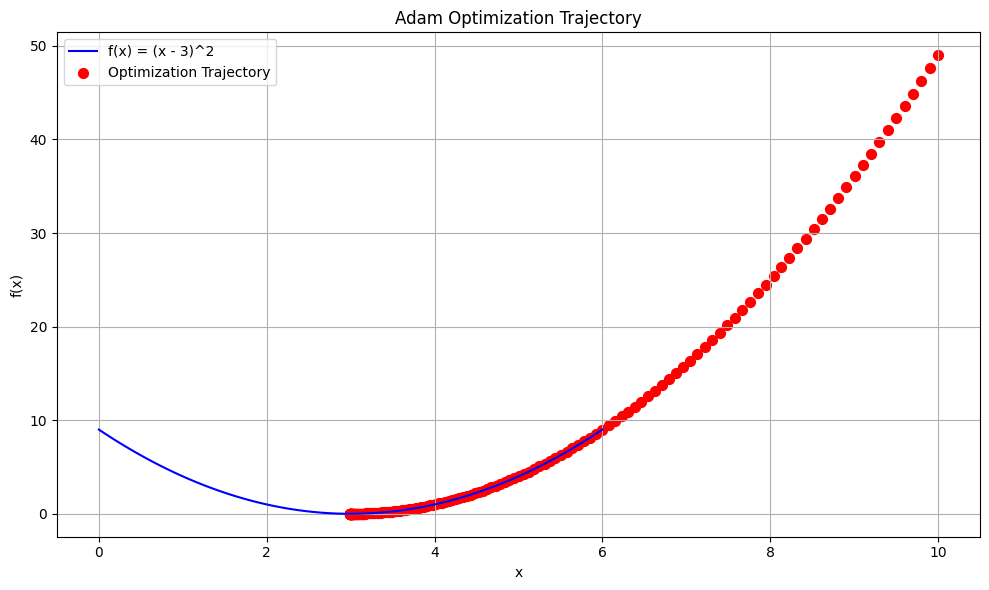

In [42]:

# Extract x and f(x) values from the trajectory
x_values = [point[0] for point in trajectory]
y_values = [point[1] for point in trajectory]

# Plot the function and optimization trajectory
plt.figure(figsize=(10, 6))
x_range = np.linspace(0, 6, 100)
plt.plot(x_range, f(x_range), label='f(x) = (x - 3)^2', color='blue')
plt.scatter(x_values, y_values, color='red', label='Optimization Trajectory', marker='o', s=50)



plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Adam Optimization Trajectory')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

